In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# load in a shapefile
map_df = gpd.read_file("datasets/London_Borough_Excluding_MHW.shp")

In [3]:
# verify that datafile is a GeoDataFrame
map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


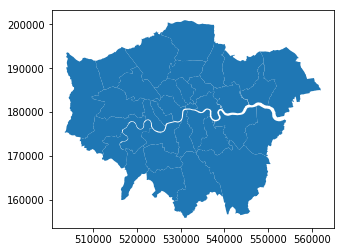

In [4]:
# preview the map with no data
map_df.plot()

In [5]:
# load the borough profiles CSV
df = pd.read_csv("datasets/London_Borough_Profiles.csv", header=0, encoding="iso-8859-1")

df.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228,Lab,0,100,0,36.5
2,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0,39.6
4,E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


In [6]:
# select columns of interest
df = df[['Area_name','Happiness_score_2011-14_(out_of_10)', 'Anxiety_score_2011-14_(out_of_10)', 'Population_density_(per_hectare)_2017', 'Mortality_rate_from_causes_considered_preventable_2012/14']]

# simplify column names
score = df.rename(index=str, columns={"Area_name": "borough",
                                      "Happiness_score_2011-14_(out_of_10)": "happiness",
                                      "Anxiety_score_2011-14_(out_of_10)": "anxiety",
                                      "Population_density_(per_hectare)_2017": "pop_density_per_hectare",
                                      "Mortality_rate_from_causes_considered_preventable_2012/14": 'mortality'})

# check dat dataframe
score.head()

,borough,happiness,anxiety,pop_density_per_hectare,mortality
0,City of London,6.0,5.6,30.3,129
1,Barking and Dagenham,7.1,3.1,57.9,228
2,Barnet,7.4,2.8,44.9,134
3,Bexley,7.2,3.3,40.3,164
4,Brent,7.2,2.9,76.8,169


In [7]:
# join the geodataframe with the csv dataframe
merged = map_df.set_index('NAME').join(score.set_index('borough'))

merged.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,happiness,anxiety,pop_density_per_hectare,mortality
NAME,,,,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",7.4,3.3,47.1,141
Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ...",7.2,3.3,44.7,178
Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9...",7.4,3.3,21.8,148
Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ...",7.4,3.4,49,166
Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ...",7.3,3.6,63.3,164


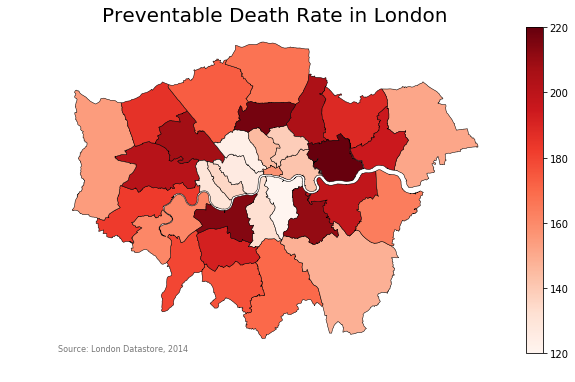

In [8]:
# set the choropleth range extremes
vmin, vmax = 120, 220

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map visualizing 'pop_density_per_hectare'
merged.plot(column='pop_density_per_hectare', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0')

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Preventable Death Rate in London', \
              fontdict={'fontsize': '20',
                        'fontweight' : '2'})

# add data source annotation
ax.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left',
           fontsize=8, color='#777777')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

fig.savefig('pdrl_map.png', dpi=300)
